
# **The Sparks Foundation-Graduate Rotational Intership Program (TSF-GRIP)**
###**April, 2024**
**Domain: Data Science & Business Analytics**<br>
**Task 1: Prediction using superverised ML (Level - Beginner)**


>**Predict the percentage of a Student based on the number of study hours.**

> **Author: Muhammad Omer Shahid, 03 April 2024**



In this task we are dealing with Prediction. There are two types of predictive models.

1.   Classification models

2.  Regression models





This is a regration problem. Regression is used to predict continuous values. Classification is used to predict which class a data point is part of (discrete value). <br><br>In this regression task we will predict the percentage of student expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
<br><br>
**Linear Regression:** <br>Y = a + b * X &nbsp; &nbsp; OR &nbsp; &nbsp; Y = Intercpt + cooefficient * X




## **Linear Regression with Python Scikit Learn**
In this section we will use Python Scikit-Learn library for machine learning and implement regression functions. We will start with simple linear regression involving two variables.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset
Data which we are using for tis task is provided [here](http://bit.ly/w-data)

In [ ]:
# Reading data from this url
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [ ]:
# Display dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis (EDA)

Let's plot data points on graph to see any relationship or pattren between the data.

<function matplotlib.pyplot.show(close=None, block=None)>

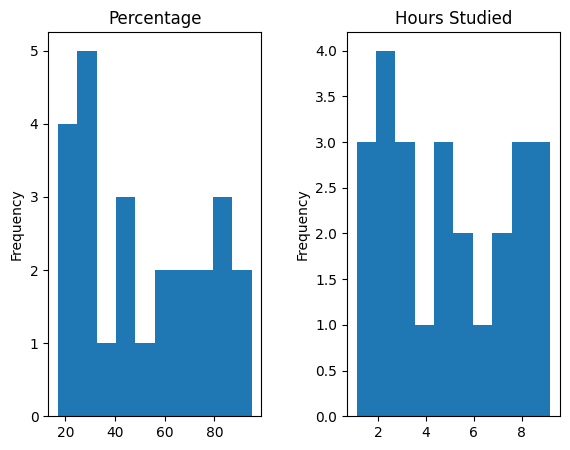

In [ ]:
ax=plt.subplot(1, 2, 1)
df['Scores'].plot(kind='hist' , title='Percentage' )
plt.subplot(1, 2, 2)
df['Hours'].plot(kind='hist' , title='Hours Studied')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show

We have generated histograms for the individual variables, Percentage Scores and Hours, but couldn't discern any apparent pattern or relationship between them since histograms represent the distribution of data.<br><br> Now, let's construct a scatter plot with the number of hours on the x-axis and Percentage Scores on the y-axis to visually explore the potential relation between the two variables.

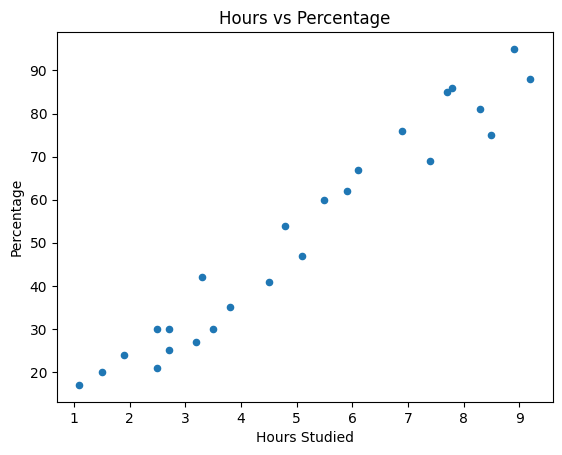

In [ ]:
df.plot(kind='scatter', x='Hours', y='Scores', title ='Hours vs Percentage' ,xlabel='Hours Studied' ,ylabel='Percentage' )
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and the percentage of the score. The positive linear regression suggests that an increase in the number of hours studied is associated with a corresponding increase in the percentage of the score.

**Preparing the data**

*   Get X and Y from dataset
*   Reshape
*   Spliting dataset into training and test datasets
*   Traing data



In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
x = df.loc[:,'Hours'].values
y = df.loc[:,'Scores'].values


print("X size: ",len(x)," X shape: ",x.shape)
print("Y size: ",len(y)," y shape: ",y.shape)

X size:  25  X shape:  (25,)
Y size:  25  y shape:  (25,)


 **Reshape**

In [ ]:
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)

print("X size: ",len(x)," X shape: ",x.shape)
print("Y size: ",len(y)," y shape: ",y.shape)

X size:  25  X shape:  (25, 1)
Y size:  25  y shape:  (25, 1)


**Spliting dataset into training and test datasets using Scikit-Learn's built-in train_test_split() method:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [ ]:
print("X_train size: ",len(X_train)," X_train shape: ",X_train.shape)
print("X_test:  size: ",len(X_test)," X_test shape: ",X_test.shape)
print("y_train size: ",len(y_train)," y_train shape: ",y_train.shape)
print("y_test size: ",len(y_test)," y_test shape: ",y_test.shape)

X_train size:  20  X_train shape:  (20, 1)
X_test:  size:  5  X_test shape:  (5, 1)
y_train size:  20  y_train shape:  (20, 1)
y_test size:  5  y_test shape:  (5, 1)


**Training Model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete")

Training complete


**Plotting the regression line on scatter plot**








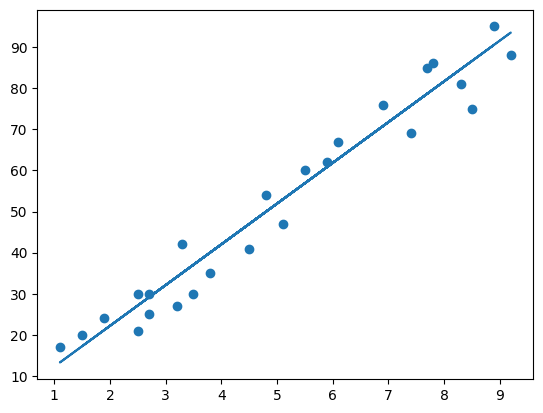

In [ ]:
# Plotting the regression line
line = regressor.coef_ * x + regressor.intercept_
# Y = a + b * X     OR     Y = Intercpt + cooefficient * X

# Plotting for the test data

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

 A regression line is a straight line that describes how a response variable y changes as an explanatory variable x changes. A regression line can be used to predict the value of y for a given value of x. Regression analysis identifies a regression line.


 **Predict**

In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
Comparing = pd.DataFrame({'Hours': X_test[:,0],'Actual Percentage': y_test[:,0], 'Predicted Percentage': y_pred[:,0]})
Comparing

,Hours,Actual Percentage,Predicted Percentage
0,9.2,88,93.522981
1,2.5,21,27.156865
2,1.5,20,17.251474
3,5.1,47,52.910880
4,2.7,30,29.137943


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Calculate R-squared (R2) score
r2 = r2_score(y_test[:,0],  y_pred[:,0])
print("R-squared (R2) score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[:,0],  y_pred[:,0])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test[:,0],  y_pred[:,0])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2) score: 0.9651844996246829
Mean Absolute Error (MAE): 4.240261870230557
Mean Squared Error (MSE): 22.32926932071336
Root Mean Squared Error (RMSE): 4.725385626667242


The high R-squared score and relatively low values of MAE, MSE, and RMSE indicate that the model fits the data well and makes accurate predictions of the percentage values.